In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root_folder = Path().absolute().parent / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [146]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: imdb_pr
n_repeats: 5
scenario_params_list:
 - dataset_name:
     - 'imdb'
   partners_count:
     - 3
   amounts_per_partner: 
     - [0.4, 0.3, 0.3]
   samples_split_option: 
     - ['basic', 'random']
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform'
   epoch_count: 
     - 38
   minibatch_count: 
     - 10
   gradient_updates_per_pass_count:
     - 8



In [147]:
experiment_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
aggregation_weighting              7 non-null object
dataset_fraction_per_partner       7 non-null object
dataset_name                       7 non-null object
epoch_count                        7 non-null float64
final_relative_nb_samples          7 non-null object
gradient_updates_per_pass_count    7 non-null float64
is_early_stopping                  7 non-null float64
learning_computation_time_sec      7 non-null float64
minibatch_count                    7 non-null float64
mpl_nb_epochs_done                 7 non-null float64
mpl_test_score                     7 non-null float64
multi_partner_learning_approach    7 non-null object
nb_samples_used                    7 non-null float64
partners_count                     7 non-null float64
samples_split_description          7 non-null object
scenario_name                      7 non-null object
short_scenario_name                7 non-n

In [159]:
df.head()

,aggregation_weighting,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
0,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,16246.331605,10.0,8.0,...,16200.0,3.0,random,scenario_1_repeat_1_2020-07-20_11h39_11b,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,0,270.772193
1,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,9445.044336,10.0,5.0,...,16200.0,3.0,random,scenario_2_repeat_1_2020-07-20_16h10_011,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,1,157.417406
2,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,9467.179304,10.0,5.0,...,16200.0,3.0,random,scenario_3_repeat_1_2020-07-20_18h48_b05,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,2,157.786322
3,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,9689.733243,10.0,5.0,...,16200.0,3.0,random,scenario_4_repeat_1_2020-07-20_21h25_6de,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,3,161.495554
4,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,12157.885526,10.0,6.0,...,16200.0,3.0,random,scenario_1_repeat_2_2020-07-21_00h07_954,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,1,0,202.631425


In [160]:
df.mpl_test_score                     

0    0.49896
1    0.49572
2    0.49868
3    0.49776
4    0.49936
5    0.49520
6    0.50048
Name: mpl_test_score, dtype: float64

In [153]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_options = df.samples_split_description.unique()
amounts_per_partner_list = df.dataset_fraction_per_partner.unique()
gradient_updates_per_pass_count_list = df.gradient_updates_per_pass_count.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()
df.head(5)

Random state [0 1]
Scenario id [0 1 2 3]
amounts_per_partner ['[0.4, 0.3, 0.3]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 22 columns):
aggregation_weighting              7 non-null object
dataset_fraction_per_partner       7 non-null object
dataset_name                       7 non-null object
epoch_count                        7 non-null float64
final_relative_nb_samples          7 non-null object
gradient_updates_per_pass_count    7 non-null float64
is_early_stopping                  7 non-null float64
learning_computation_time_sec      7 non-null float64
minibatch_count                    7 non-null float64
mpl_nb_epochs_done                 7 non-null float64
mpl_test_score                     7 non-null float64
multi_partner_learning_approach    7 non-null object
nb_samples_used                    7 non-null float64
partners_count                     7 non-null float64
samples_split_description          7 non-null object
scenario_name

,aggregation_weighting,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
0,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,16246.331605,10.0,8.0,...,16200.0,3.0,random,scenario_1_repeat_1_2020-07-20_11h39_11b,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,0,270.772193
1,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,9445.044336,10.0,5.0,...,16200.0,3.0,random,scenario_2_repeat_1_2020-07-20_16h10_011,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,1,157.417406
2,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,9467.179304,10.0,5.0,...,16200.0,3.0,random,scenario_3_repeat_1_2020-07-20_18h48_b05,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,2,157.786322
3,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,9689.733243,10.0,5.0,...,16200.0,3.0,random,scenario_4_repeat_1_2020-07-20_21h25_6de,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,0,3,161.495554
4,uniform,"[0.4, 0.3, 0.3]",imdb,38.0,"[0.4, 0.3, 0.3]",8.0,1.0,12157.885526,10.0,6.0,...,16200.0,3.0,random,scenario_1_repeat_2_2020-07-21_00h07_954,"3 [0.4, 0.3, 0.3]",25000.0,20000.0,1,0,202.631425


In [154]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_description + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

AttributeError: 'DataFrame' object has no attribute 'amounts_per_partner'

In [155]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
gradient_updates_per_pass_count: 8.0


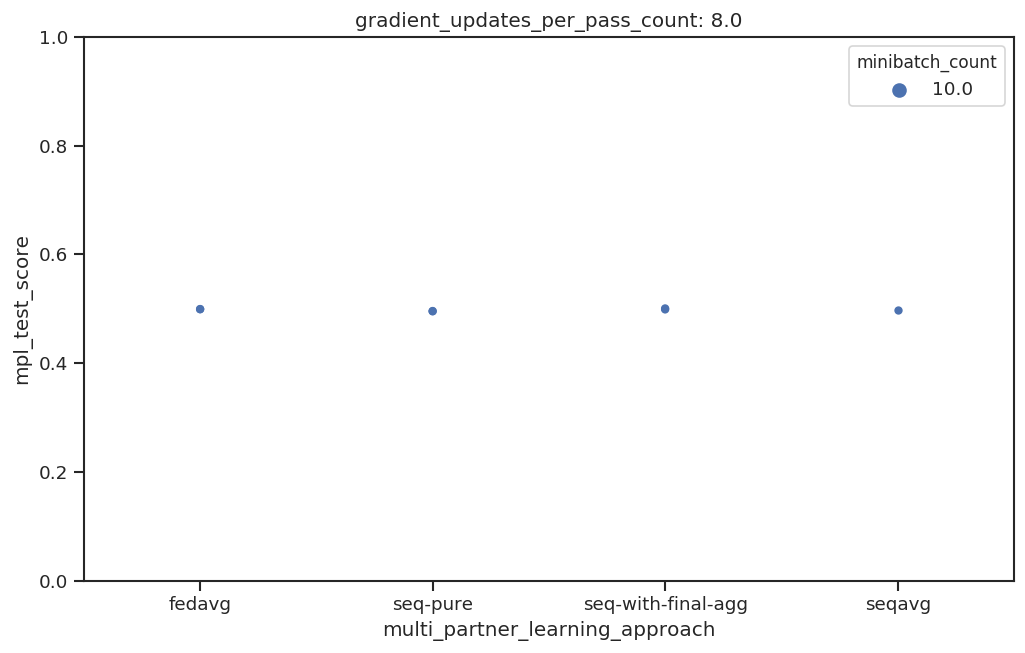

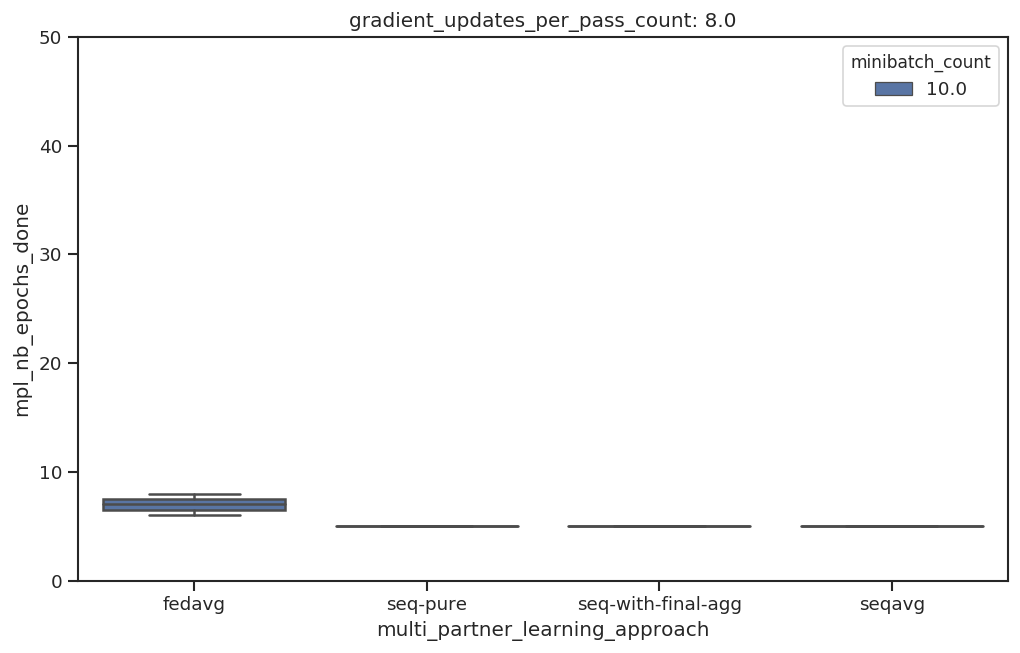

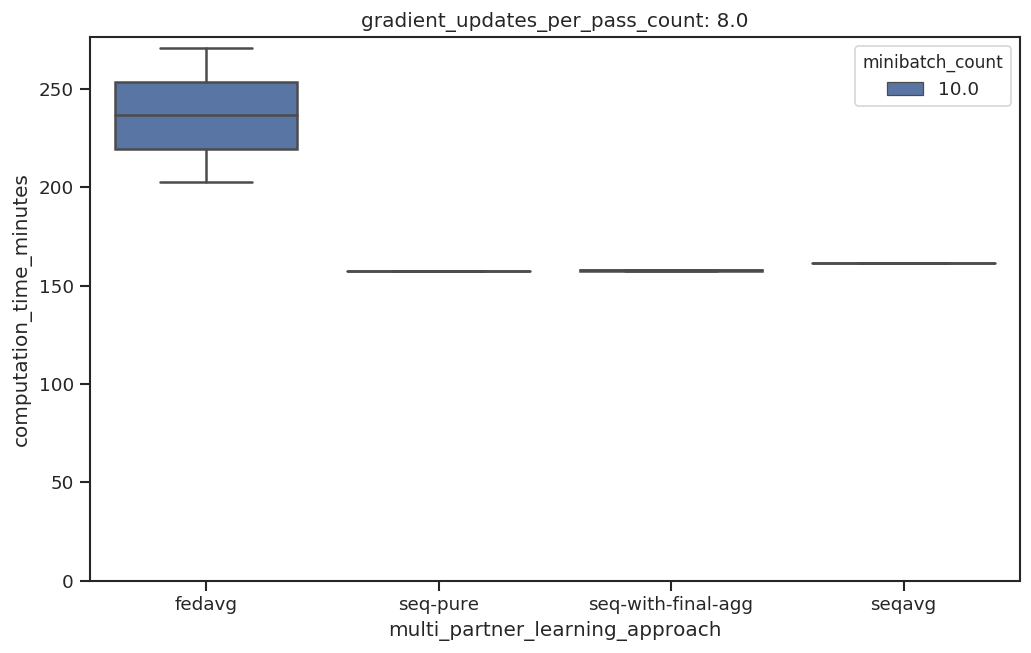

In [158]:
# Plot loop
for amounts_per_partner in amounts_per_partner_list:
        
        current_df = df[(df.dataset_fraction_per_partner == amounts_per_partner)]

        sns.set(style="ticks")
        #current_df.info()
        print("################################################")
        title = "gradient_updates_per_pass_count: " + str(gradient_updates_per_pass_count)
        print(title)

        plt.figure(figsize=(10, 6), dpi=120)
        plt.title(title)
        ax = sns.swarmplot(x="multi_partner_learning_approach", y="mpl_test_score", hue="minibatch_count",
                           data=current_df)
        plt.ylim([0, 1])

        plt.figure(figsize=(10, 6), dpi=120)
        plt.title(title)
        ax = sns.boxplot(x="multi_partner_learning_approach", y="mpl_nb_epochs_done", hue="minibatch_count",
                           data=current_df)
        plt.ylim([0, 50])


        ax = plt.figure(figsize=(10, 6), dpi=120)
        plt.title(title)
        sns.boxplot(x="multi_partner_learning_approach", y="computation_time_minutes", hue="minibatch_count",
                         data=current_df)
        plt.ylim(bottom=0)


        plt.show()
    